# Demo

Demo code for latent-space-data-assimilation using a 2D multi-Gaussian field dataset and a linear forward model as the simulator.

For nonlinear forward model, simply replace "dataset.simulator" with the nonlinear simulation function.

In [2]:
import random
import string
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.cm as cm
from matplotlib.colors import Normalize
%matplotlib inline

import dataloader
import util
import autoencoderdual

class_names = ['Meandering', 'Anastomosing-0', 
               'Anastomosing-135', 'Anastomosing-90', 'Anastomosing-45']
sc_index = class_names.index('Anastomosing-135')

#load data and filter by scenario
dataset = dataloader.DataLoader(simulator=np.load('G100.npy'), scenario = sc_index, verbose=True)
x_train, x_test, y_reg_train, y_reg_test = dataset.load_data()

Running simulation  0
Running simulation  1
Running simulation  2
Running simulation  3
Running simulation  4
Running simulation  5
Running simulation  6
Running simulation  7
Running simulation  8
Running simulation  9
Running simulation  10
Running simulation  11
Running simulation  12
Running simulation  13
Running simulation  14
Running simulation  15
Running simulation  16
Running simulation  17
Running simulation  18
Running simulation  19
Running simulation  20
Running simulation  21
Running simulation  22
Running simulation  23
Running simulation  24
Running simulation  25
Running simulation  26
Running simulation  27
Running simulation  28
Running simulation  29
Running simulation  30
Running simulation  31
Running simulation  32
Running simulation  33
Running simulation  34
Running simulation  35
Running simulation  36
Running simulation  37
Running simulation  38
Running simulation  39
Running simulation  40
Running simulation  41
Running simulation  42
Running simulation  4

Running simulation  346
Running simulation  347
Running simulation  348
Running simulation  349
Running simulation  350
Running simulation  351
Running simulation  352
Running simulation  353
Running simulation  354
Running simulation  355
Running simulation  356
Running simulation  357
Running simulation  358
Running simulation  359
Running simulation  360
Running simulation  361
Running simulation  362
Running simulation  363
Running simulation  364
Running simulation  365
Running simulation  366
Running simulation  367
Running simulation  368
Running simulation  369
Running simulation  370
Running simulation  371
Running simulation  372
Running simulation  373
Running simulation  374
Running simulation  375
Running simulation  376
Running simulation  377
Running simulation  378
Running simulation  379
Running simulation  380
Running simulation  381
Running simulation  382
Running simulation  383
Running simulation  384
Running simulation  385
Running simulation  386
Running simulati

# Train LSDA model

In practice, we have only:

1. Model realizations (from multiple scenarios) as "x_train",
2. Pre-defined scenario label as "y_train", and
3. A forward simulator as "dataset.simulator",

and we run forward simulations to obtain production responses "y_reg_train".

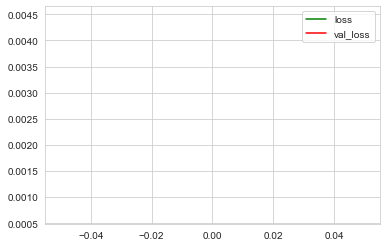

(600, 6)
(600, 2)


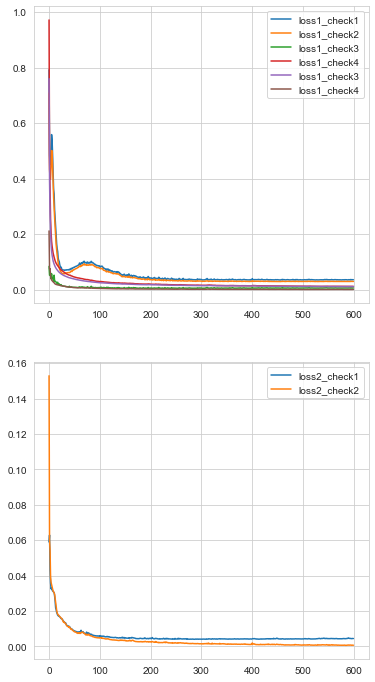

In [3]:
#load trained LSDA architecture, to retrain set "load=False", ~2hr on NVIDIA RTX2080Ti
LSDA = autoencoderdual.Autoencoder(x_train, y_reg_train, variational=False)
LSDA.train_autoencoder_dual_LSF(epoch=600, load=True)

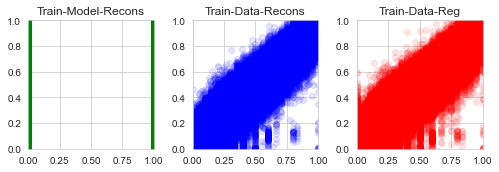

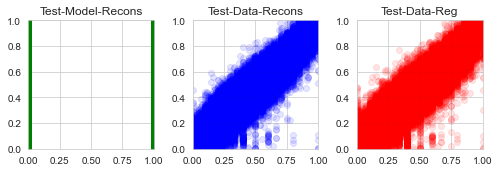

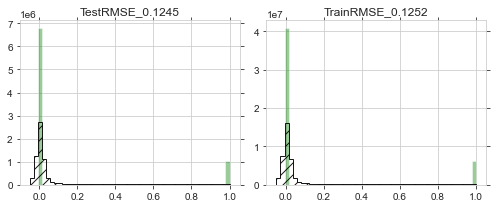

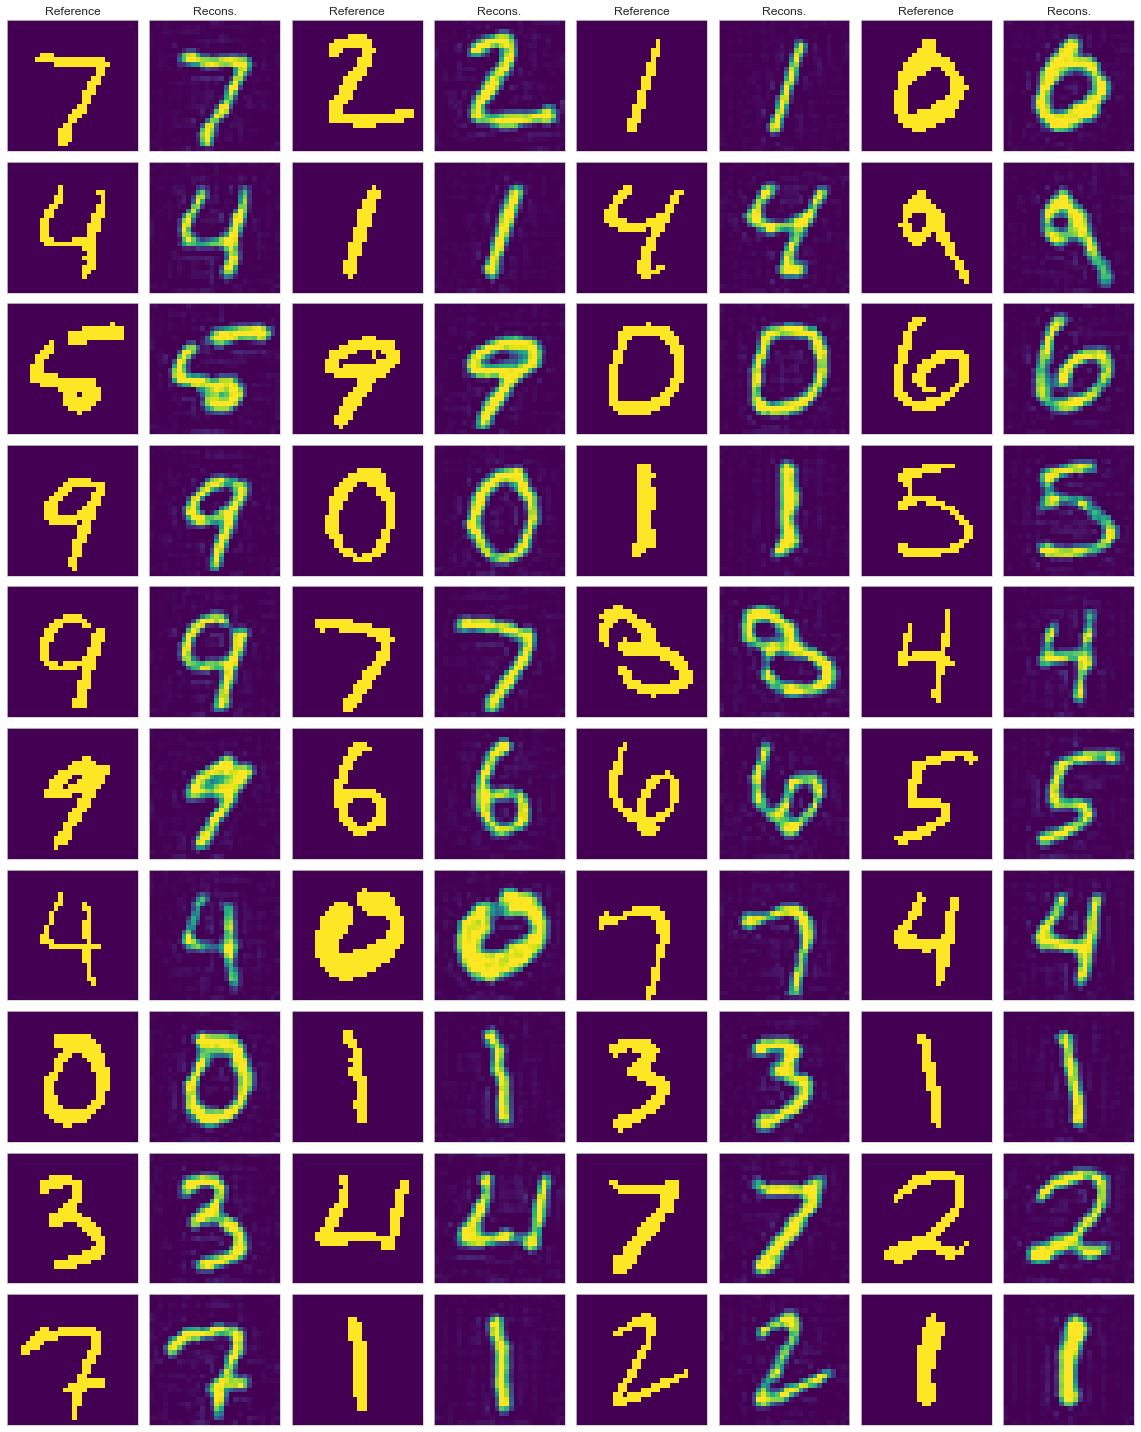

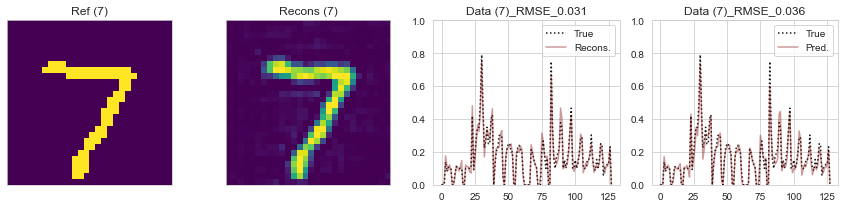

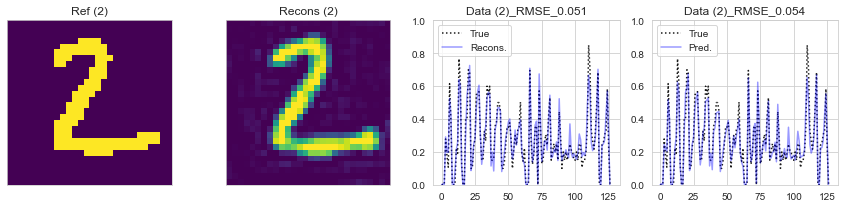

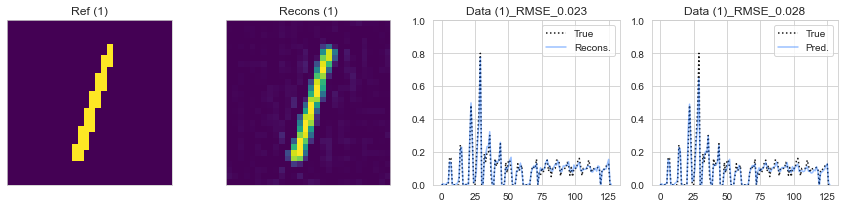

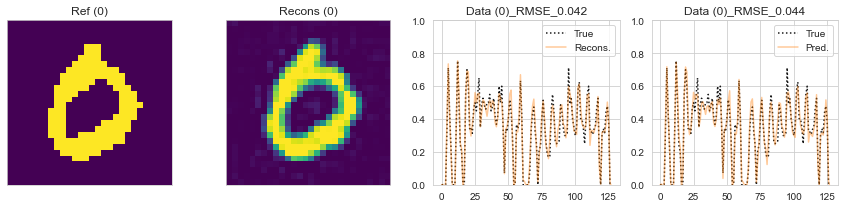

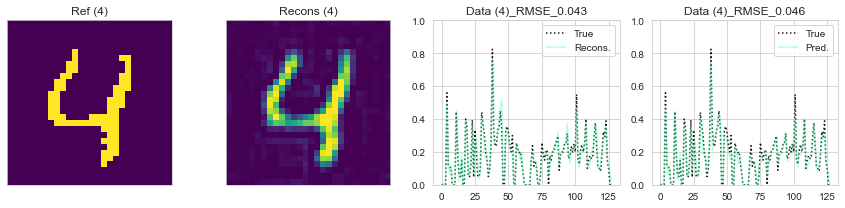

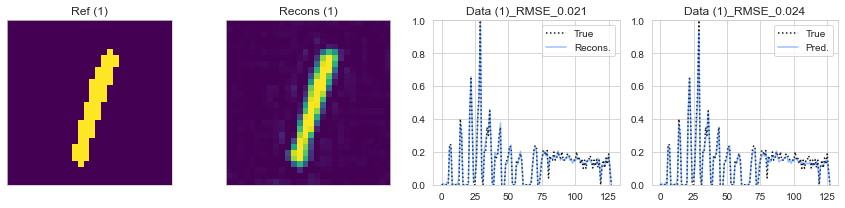

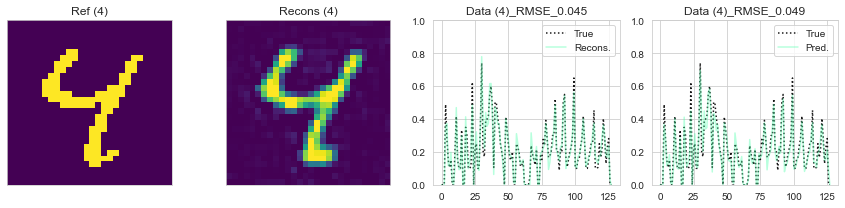

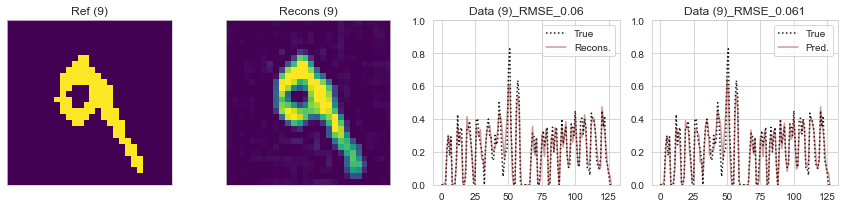

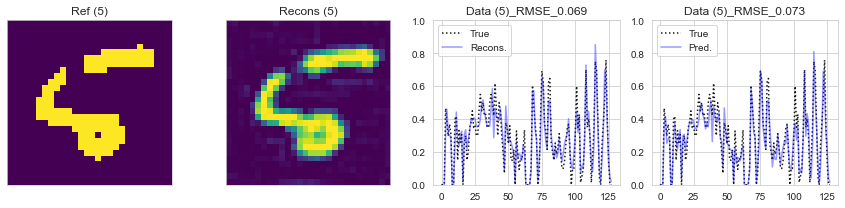

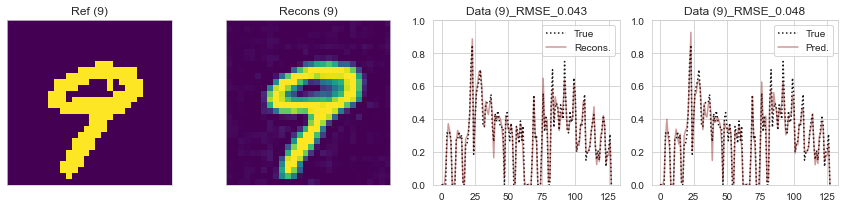

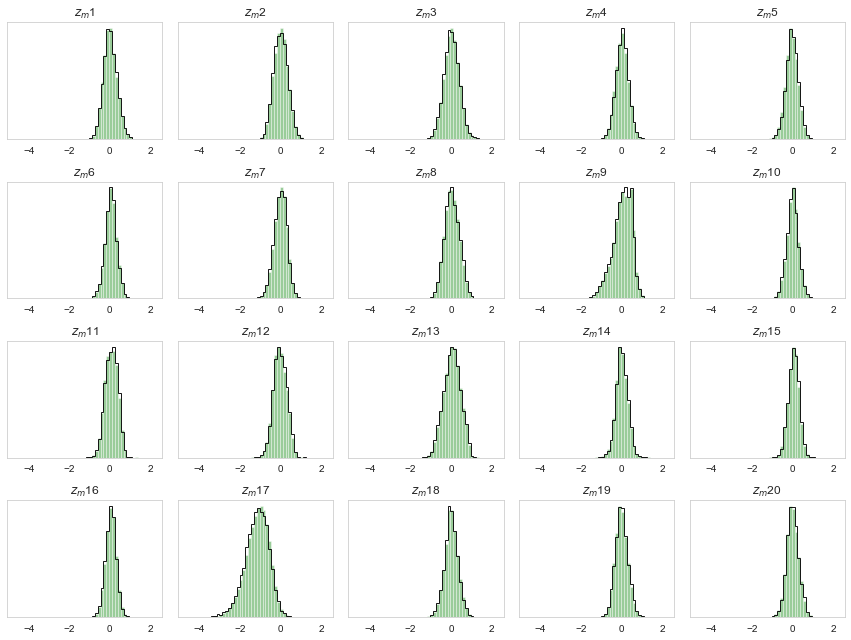

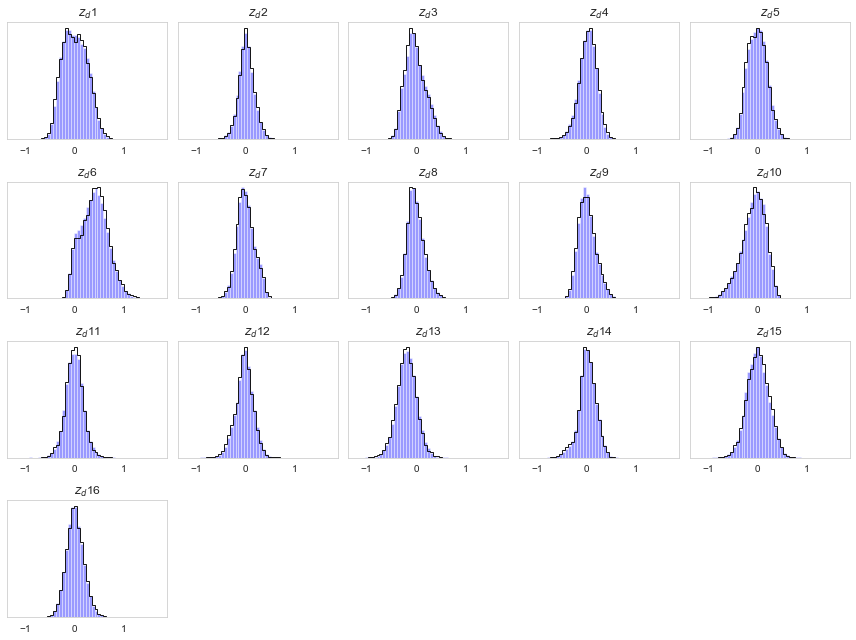

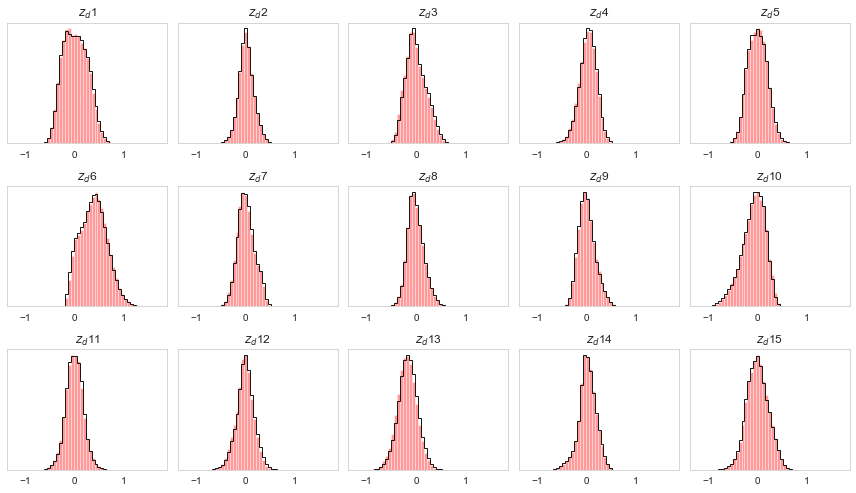

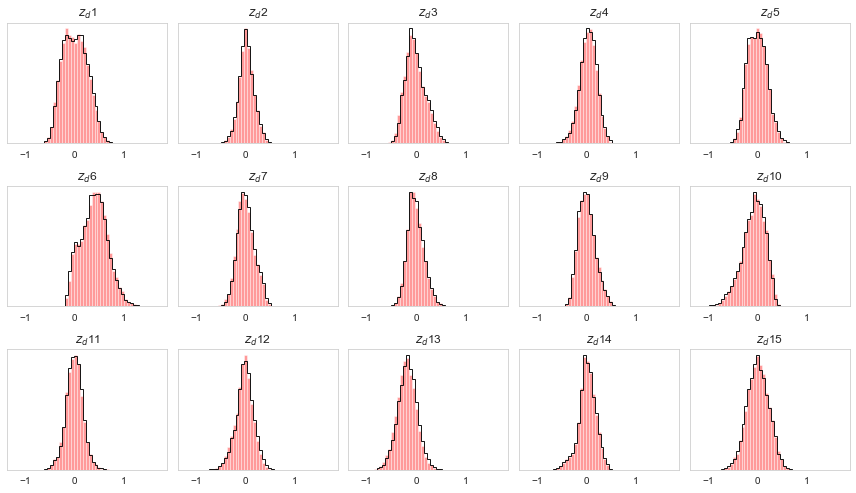

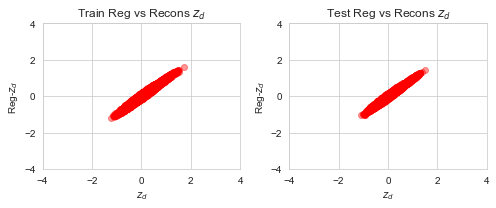

In [5]:
autoencoderdual.inspect_LSF(LSDA, x_test, y_reg_test, y_test)
autoencoderdual.inspect_LSF_z(LSDA, x_test, y_reg_test, y_test)

In [6]:
print("QC complete")

QC complete
